# placa Triangular

This is the Laplace equation in 2-D cartesian coordinates (for heat equation)

$$ \frac{\partial^2 T}{\partial^2 x}+\frac{\partial^2 T}{\partial^2 y}=0 $$

Where T is temperature, x is x-dimension, and y is y-dimension. x and y are functions of position in Cartesian coordinates.

Here, we only need to solve 2-D form of the Laplace equation. The problem to solve is shown below:

La ecuación de laplace discretizada queda de la siguiente forma:

$$
T(x,y)=\frac{T(x+1,y) + T(x+1,y) + T(x,y+1) + T(x,y+1)}{4}
$$

importamos las librerias que vamos a necesitar

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

In [7]:
#preparar la matriz
L=101
m=int((L-1)/2)
P=np.zeros((L-m+1,L))
Ttiempo=np.zeros(((L-m+1,L,1)))
condcon=100
# llenar la matriz condiciones de frontera
for i in range(0,L-m+1):
    for j in range(0,L):
        if(j==(m-i) or j==(m+i)):
            P[i,j]=50
            Ttiempo[i,j,0]=P[i,j]
        if(i==(L-m)):
            P[i,j]=condcon
            Ttiempo[i,j,0]=P[i,j]
# llenar matriz adentro de la placa
guess=30
for i in range(1,L-m):
    for j in range(0,L):
        if(j>(m-i) and j<(m+i)):
            P[i,j]=guess
            Ttiempo[i,j,0]=P[i,j]

In [8]:
target = 1e-3  # Target accuracy

# Iteration (We assume that the iteration is convergence in maxIter = 500)
cont=0
error=1
diff=np.zeros((L-m+1,L))
print("Please wait for a moment")
P = np.expand_dims(P, axis=2)
inicio=time.time()
while error>target:
    Pcopy=np.copy(P)
    for i in range(1,L-m):
        for j in range(0,L):
            if(j>(m-i) and j<(m+i)):
                    P[i,j]=0.25*(P[i+1][j] + P[i-1][j] + P[i][j+1] + P[i][j-1])
                    
    for i in range(1,L-m):
        for j in range(0,L):
            if(j>(m-i) and j<(m+i)):
                diff[i,j]=np.abs(Pcopy[i,j]-P[i,j])
    
    percentage=cont/682*100
    print("Completado:{} %".format(round(percentage,2)), end='\r')
    error=np.max(diff)
    cont+=1
    Ttiempo = np.append(Ttiempo,P, axis=2)
fin=time.time()
print("Iteration finished")
print("el numero de interacciones fueron:",cont)
print("tiempo de ejecución: ",fin-inicio)

Please wait for a moment
Iteration finished%
el numero de interacciones fueron: 1219
tiempo de ejecución:  38.53424596786499


In [10]:
colorinterpolation = 100
colourMap = plt.cm.jet

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, L-m+1), np.arange(0, L))
Y

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6]])

In [ ]:
%matplotlib inline

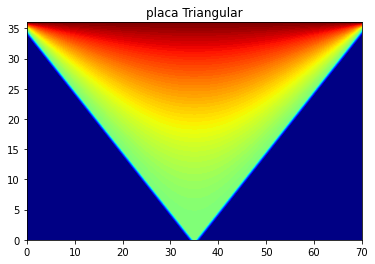

In [5]:
plt.title("placa Triangular")
plt.contourf(Y,X,Ttiempo[:,:,cont].T, colorinterpolation, cmap=colourMap)

In [ ]:
# acelerar simulación
tam=int((cont+1)*1/3)
Ttimpoac=np.zeros(((L-m+1,L,tam)))
for i in range(0,tam):
    Ttimpoac[:,:,i]=Ttiempo[:,:,i*int((cont+1)/tam)]

In [ ]:
%matplotlib

In [ ]:
#simulación
fig3=plt.figure()
ax=fig3.gca()
def puntoapunto(i):
    ax.clear()
    plt.title("placa triangular")
    plt.contourf(Y,X,Ttimpoac[:,:,i].T, colorinterpolation, cmap=colourMap)
ani=animation.FuncAnimation(fig3, puntoapunto, range(tam))
# ani.save("Gradiente_de_laplaca_triangular.mp4", writer="ffmpeg")
plt.show()

# Versiones de libreririas Utilizadas para la construcción del notebook

In [7]:
%load_ext version_information

%version_information numpy, scipy, matplotlib, sympy, version_information

Software versions
Python 3.9.12 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.30.0
OS Windows 10 10.0.19044 SP0
numpy 1.20.3
scipy 1.7.3
matplotlib 3.4.0
sympy 1.9
version_information 1.0.4
Sun Oct 09 22:58:05 2022 Hora est. Pacífico, Sudamérica